# DTSA 5511 Deep Learning Final Project

## Background

This project predicts the presence of defects in C programs given a set McCabe and Halstead Code Measures, which are static measures used to define a code’s complexity level. The files for this project may be found at [https://github.com/IvMonares/deep_learning_final_project/](https://github.com/IvMonares/deep_learning_final_project/).

Thomas J. McCabe (1976) argued that code with complicated pathways are more error-prone. Therefore, his metrics reflect the number of linearly independent paths within a code module. 

Maurice Howard Halstead (1977) argued that code that is hard to read is more likely to be fault prone. Halstead estimates reading complexity by counting the number of concepts in a module; e.g. number of unique operators.

The use of this type of models is to be able to automatically evaluate newly written programs for errors during a Software Quality Assurance workflow, without the need for a dedicated Software engineer to manually review all of the code. Since static measures can never be a definite and certain indicator of the presence of a fault, defect detectors based on them are best viewed as probabilistic statements. 

The goal for this project is to obtain an deep learning model with comparable results to supervised or unsupervised learning models. This project’s dataset was generated from a deep learning model trained on the [Software Defect Dataset](https://www.kaggle.com/datasets/semustafacevik/software-defect-prediction), and was published as part of the “Binary Classification with a Software Defects Dataset” Kaggle competition. 

> Walter Reade, Ashley Chow. (2023). Binary Classification with a Software Defects Dataset. Kaggle. https://kaggle.com/competitions/playground-series-s3e23



## Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset and create training an testing datasets
training_set = pd.read_csv('./Data/train.csv')
training_set = training_set.drop(columns=["id"])
print(training_set.head())
training_set.describe()

    loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e  ...  \
0  22.0   3.0    1.0    2.0  60.0  278.63  0.06  19.56  14.25  5448.79  ...   
1  14.0   2.0    1.0    2.0  32.0  151.27  0.14   7.00  21.11   936.71  ...   
2  11.0   2.0    1.0    2.0  45.0  197.65  0.11   8.05  22.76  1754.01  ...   
3   8.0   1.0    1.0    1.0  23.0   94.01  0.19   5.25  17.86   473.66  ...   
4  11.0   2.0    1.0    2.0  17.0   60.94  0.18   5.63  12.44   365.67  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0      17          1        1                  0     16.0        9.0   
1      11          0        1                  0     11.0       11.0   
2       8          0        1                  0     12.0       11.0   
3       4          0        2                  0      8.0        6.0   
4       7          0        2                  0      7.0        6.0   

   total_Op  total_Opnd  branchCount  defects  
0      38.0        22.0          5.0    Fals

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,1.017630e+05,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,2.085359e+04,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,1.905714e+05,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,5.647300e+02,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,2.256230e+03,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,1.019324e+04,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,1.684662e+07,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


Dataset consists of 101,763 records with the score of 20 different code metrics. The metrics consist of 4 McCabe metrics, 4 basic operator/operand summations, and multiple Halstead calculated metrics.

Per the data source, attribute information is encoded in the following manner:

| Column Name | Definition | Description
| ------ | ------ | ------ |
| loc | McCabe's line count of code | Number of lines of code in module |
| v(g) | McCabe "cyclomatic complexity" | Number of conditional branches in module |
| ev(g) | McCabe "essential complexity" | Degree to which a module contains unstructured constructs |
| iv(g) | McCabe "design complexity" | Reflects the complexity of the module's calling patterns to its immediate subordinate modules |
| n | Halstead total operators + operands | Total number of distinct operators and operands in the program |
| v | Halstead "volume" | The product of program length (N) and the logarithm of vocabulary size (n) - V = N * log2(n) | 
| l | Halstead "program length" | Ratio of operator occurrences to operand occurrences in the program, L = total_Op / total_Opnd |
| d | Halstead "difficulty" | Ratio of unique operators to the total number of operators, D = uniq_Op / total_Op. |
| i | Halstead "intelligence" | Ratio of program volume to difficuly, I = V / D |
| e | Halstead "effort" | This is the product of program volume (V) and program difficulty (D), E = V * D |
| b | Halstead |  |
| t | Halstead's time estimator | This is the estimated time required to implement the program, based on the program effort (E) |
| lOCode | Halstead's line count |  |
| lOComment | Halstead's count of lines of comments |  |
| lOBlank | Halstead's count of blank lines |  |
| lOCodeAndComment | numeric |  |
| uniq_Op | numeric unique operators |  |
| uniq_Opnd | numeric unique operands |  |
| total_Op | numeric total operators |  |
| total_Opnd | numeric total operands |  |
| branchCount | numeric of the flow graph |  |
| defects | {false,true} module has/has not one or more reported defects | |

## Data Cleaning

The data contained by this dataset is already clean and has been stored in appropiate data types according to the information contained in each column. The only features that was be removed from the dataset was the "id" column, as it has no correlation to the value in the "defects" column.

## Data Correlation

First, we analyze the correlation of each attribute with the presence of code defects.

defects              1.000000
loc                  0.342642
branchCount          0.322827
v(g)                 0.301187
ev(g)                0.259928
n                    0.258080
lOBlank              0.257819
l                    0.253237
total_Opnd           0.252752
lOCode               0.250604
total_Op             0.250533
uniq_Opnd            0.246113
iv(g)                0.245618
d                    0.241936
b                    0.232594
v                    0.231179
i                    0.208577
lOComment            0.205402
uniq_Op              0.178474
locCodeAndComment    0.133150
t                    0.099592
e                    0.095366
Name: defects, dtype: float64


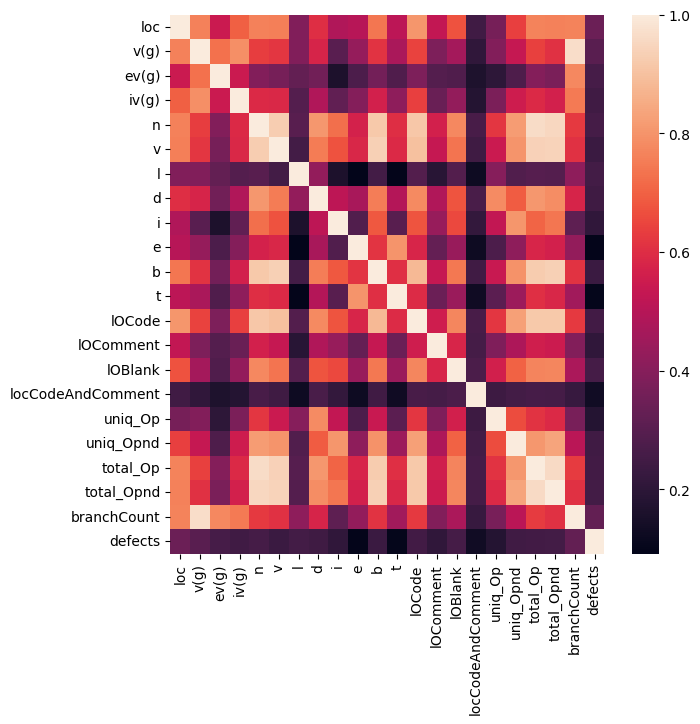

In [3]:
def print_correlations(data_matrix, abs_values=False):
    correlation = data_matrix.corr()

    if(abs_values):
        correlation = abs(correlation)

    sorted_corr = (correlation["defects"]).sort_values(ascending=False)
    print(sorted_corr)

    plt.figure(figsize = (7, 7))
    sns.heatmap(correlation)

print_correlations(training_set, True)

We can see from the correlation matrix that there is a low absolute correlation between the presence of defects and any given features.
Therefore, it will be necessary to utilize multiple or even all features for model training.

From the printed absolute correlation values, we can see that "lines of code (loc)", "branch count (branchCount)" and "cyclomatic complexity (v(g))" and "essential complexity (ev(g))" have the most correlation with the presence of defects. This supports McCabe's position that defects are related to a program's complexity.

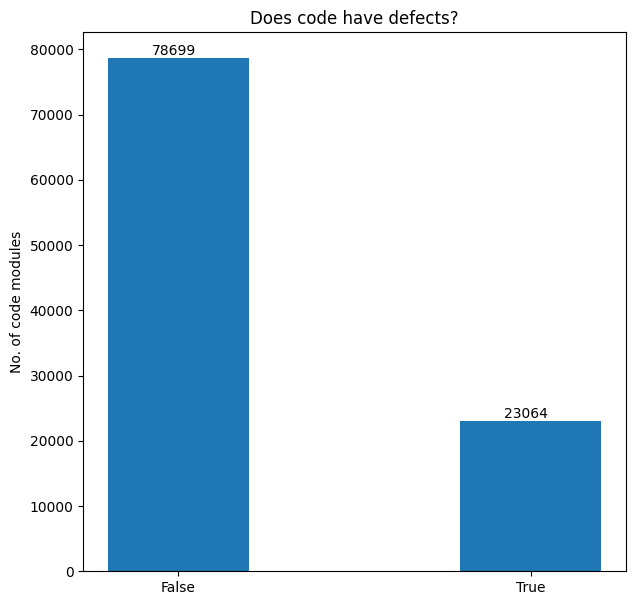

In [4]:
# creating the dataset
data = training_set["defects"].value_counts()
has_defects = [str(item) for item in data.index ]
values = list(data.values)
  
fig = plt.figure(figsize = (7, 7))
plt.bar(has_defects, values, width = 0.4)

for i in range(len(values)):
        plt.text( i-0.075, values[i]+500, values[i])

plt.ylabel("No. of code modules")
plt.title("Does code have defects?")
plt.show()

We can observe that the training dataset is unbalanced, with a 3 to 1 proportion of C programs that do not have any programming defects against those that do. It is important to take this into account during model trainings, to either ensure the proportion is kept, or to balance the samples to prevent skewed results.

For this project, the approach will be to balance the groups during training and use the rest of the records for testing. First, the training dataset will be split into "True" and "False" groups according to the "defects" label. Then, a proportion for "true" records to be included during training will be set, and the corresponding proportion of "False" records will be calculated accordingly. Then, the "True" and "False" groups will be further split into training and testing sets based on the previous proportions. Finally, all training datasets will be merged, and all testing datasets will be merged.

## Models for Analysis

This problem is suitable for multiple learning models beyond deep learning. Different models useful for predicting the dataset's behavior can be found at the following files. 

* Deep Learning
    * Dense Neural Network - Linear.ipynb
    * Dense Neural Network - Leaky ReLU.ipynb
* Supervised Learning
    * Logistic Regression.ipynb
    * K-Nearest Neighbors.ipynb
* Unsupervised Learning
    * Singular Value Decomposition.ipynb
    * Non-Negative Matrix Factorization.ipynb

For supervised learning models, the “defects” feature must be transformed from a binary {False/True} to a binary {0/1}, to be able to properly perform regressions.

## Results and Conclusions

Here is a summary of the results obtained for the different classification models.

| Method | Learning Type | Accuracy | Recall | Precision | F1 Score | AUC Score |
|-----|-----|-----|-----|-----|-----|-----|
| Dense Neural Network (Linear) | Deep | 0.75459 | 0.56322 | 0.46576 | 0.50987 | 0.68694 |
| Dense Neural Network (Leaky ReLU) | Deep | 0.73843 | <b>0.67898</b> | 0.44905 | <b>0.54058</b> | <b>0.71742</b> |
| Logistic Regression | Supervised | 0.77629 | 0.59547 | 0.34668 | 0.43823 | <b>0.74471</b> |
| K-Nearest Neighbors | Supervised | 0.66602 | 0.65643 | 0.25325 | 0.36549 | 0.66205 |
| Singular Value Decomposition | Unsupervised | <b>0.84800</b> | 0.26179 | <b>0.46676</b> | 0.33544 | 0.60522 |
| NMF (Optimized) | Unsupervised | 0.63786 | 0.61655 | 0.22797 | 0.33287 | 0.62903 |

The best score from the Deep Learning Models was obtained by Using Leaku ReLU in the Dense Neural Network, with an Area-Under-the-Curve value of 0.71742. Although this does not match the best score obtained by Supervised Models (Logistic Regression, AUC = 0.7447), it is superior to the results of K-Nearest Neighbors model (AUC = 0.6621) as well as both Unsupervised Learning Models.


This is due to the fact that, although the Dense NN had a smaller accuracy, it also had a much lower “False Positive” rate when compared to the Logistic Regression model, allowing for similar AUC results.

It is also important to consider what is the metric with which the models will be evaluated, as the decision for the "best" model may change based on the selected metric.
